In [1]:
import csv
import os
import numpy as np
import pandas as pd

data_14 = pd.read_csv('data10.csv')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [3]:
f = ['HLCS',
 'PTBP1',
 'ANXA4',
 'GBP1P1',
 'GBP5',
 'ACTR3',
 'DUS4L',
 'CDH22',
 'PLPP6',
 'OGN',
 'GNG12',
 'TMEM268',
 'SPNS2',
 'WDR6',
 'MST1',
 'TMEM209',
 'KCNK15',
 'HSPA5',
 'HYPK',
 'HLA-A',
 'RAP1GDS1',
 'LAX1',
 'MYLIP',
 'TIPARP',
 'GSTCD',
 'ALDH1A2',
 'IDO1',
 'ZNF184',
 'PTCH1',
 'KRT15',
 'CCDC142',
 'SRGAP2B',
 'MAFB',
 'IVD',
 'ZNF354B']

In [4]:
number = len(f)
data = data_14[f]

In [5]:
data.columns

Index(['HLCS', 'PTBP1', 'ANXA4', 'GBP1P1', 'GBP5', 'ACTR3', 'DUS4L', 'CDH22',
       'PLPP6', 'OGN', 'GNG12', 'TMEM268', 'SPNS2', 'WDR6', 'MST1', 'TMEM209',
       'KCNK15', 'HSPA5', 'HYPK', 'HLA-A', 'RAP1GDS1', 'LAX1', 'MYLIP',
       'TIPARP', 'GSTCD', 'ALDH1A2', 'IDO1', 'ZNF184', 'PTCH1', 'KRT15',
       'CCDC142', 'SRGAP2B', 'MAFB', 'IVD', 'ZNF354B'],
      dtype='object')

In [6]:
x5 = data

In [7]:
'''calculate GIC'''
res1 = x5.iloc[0:35,0:number]
sen = x5.iloc[35:197,0:number]

In [8]:
res2 = x5.iloc[197:324,0:number]

In [9]:
res = res1.append(res2)

In [10]:
d1 = res
d2 = sen
length =  len(d1)

In [11]:
junzhi = []
biaozhuncha = []
for j in range(number):
    junzhi.append(d2.iloc[:,j:j+1].mean())
    biaozhuncha.append(d2.iloc[:,j:j+1].std())

In [12]:
gene = list(res.columns)
gene

['HLCS',
 'PTBP1',
 'ANXA4',
 'GBP1P1',
 'GBP5',
 'ACTR3',
 'DUS4L',
 'CDH22',
 'PLPP6',
 'OGN',
 'GNG12',
 'TMEM268',
 'SPNS2',
 'WDR6',
 'MST1',
 'TMEM209',
 'KCNK15',
 'HSPA5',
 'HYPK',
 'HLA-A',
 'RAP1GDS1',
 'LAX1',
 'MYLIP',
 'TIPARP',
 'GSTCD',
 'ALDH1A2',
 'IDO1',
 'ZNF184',
 'PTCH1',
 'KRT15',
 'CCDC142',
 'SRGAP2B',
 'MAFB',
 'IVD',
 'ZNF354B']

In [13]:
data = pd.read_csv('X_train_10.csv')
X_train = data[gene]

In [14]:
data = pd.read_csv('X_test_10.csv')
X_test = data[gene]

In [15]:
data = pd.read_csv('y_train_10.csv')
y_train = data.iloc[:,1:2]

In [16]:
data = pd.read_csv('y_test_10.csv')
y_test = data.iloc[:,1:2]

In [17]:
z_train = pd.DataFrame(data=None, index=range(len(X_train)), columns=res.columns, dtype=None, copy=False)

#calculate z-value of d1, after selecting mu and sigma
for j in range(number):
    for i in range(len(X_train)):
        z_train.iloc[i,j] = ((X_train.iloc[i,j] - junzhi[j]) / biaozhuncha[j]).values[0]

In [18]:
alter_train = pd.DataFrame(data=None, index=range(len(X_train)), columns=res.columns, dtype=None, copy=False)
upper_bar =  0.2
lower_bar = -0.2
for j in range(number):
    for i in range(len(X_train)):
        if(z_train.iloc[i,j] >= upper_bar):
            alter_train.iloc[i,j] = 1
        elif(z_train.iloc[i,j] <= lower_bar):
            alter_train.iloc[i,j] = -1
        else:
            alter_train.iloc[i,j] = 0

In [19]:
name = alter_train.columns

In [20]:
n = number - 1
for i in range(n):
    for j in range(n-i):
        alter_train[name[i] + '_' + name[n-j]] = alter_train.apply(lambda x: x[name[i]] * x[name[n-j]], axis=1)

In [21]:
z_test = pd.DataFrame(data=None, index=range(len(X_test)), columns=res.columns, dtype=None, copy=False)

#calculate z-value of d1, after selecting mu and sigma
for j in range(number):
    for i in range(len(X_test)):
        z_test.iloc[i,j] = ((X_test.iloc[i,j] - junzhi[j]) / biaozhuncha[j]).values[0]

In [22]:
alter_test = pd.DataFrame(data=None, index=range(len(X_test)), columns=res.columns, dtype=None, copy=False)
upper_bar =  0.2
lower_bar = -0.2
for j in range(number):
    for i in range(len(X_test)):
        if(z_test.iloc[i,j] >= upper_bar):
            alter_test.iloc[i,j] = 1
        elif(z_test.iloc[i,j] <= lower_bar):
            alter_test.iloc[i,j] = -1
        else:
            alter_test.iloc[i,j] = 0

In [23]:
n = number - 1
for i in range(n):
    for j in range(n-i):
        alter_test[name[i] + '_' + name[n-j]] = alter_test.apply(lambda x: x[name[i]] * x[name[n-j]], axis=1)

In [24]:
z = pd.DataFrame(data=None, index=range(length), columns=res.columns, dtype=None, copy=False)

In [25]:
#calculate z-value of d1, after selecting mu and sigma
for j in range(number):
    for i in range(length):
        z.iloc[i,j] = ((d1.iloc[i,j] - junzhi[j]) / biaozhuncha[j]).values[0]

In [26]:
alter = pd.DataFrame(data=None, index=range(length), columns=res.columns, dtype=None, copy=False)

In [27]:
upper_bar =  0.2
lower_bar = -0.2
for j in range(number):
    for i in range(length):
        if(z.iloc[i,j] >= upper_bar):
            alter.iloc[i,j] = 1
        elif(z.iloc[i,j] <= lower_bar):
            alter.iloc[i,j] = -1
        else:
            alter.iloc[i,j] = 0

In [28]:
testz = alter

In [29]:
n = number - 1
for i in range(n):
    for j in range(n-i):
        testz[name[i] + '_' + name[n-j]] = testz.apply(lambda x: x[name[i]] * x[name[n-j]], axis=1)

In [30]:
bar = 0.75

In [31]:
for i in range(n):
    for j in range(n-i):
        if abs(testz[name[i] + '_' + name[n-j]].sum()) >= length * bar:
            X_train[name[i] + '_' + name[n-j]] = alter_train[name[i] + '_' + name[n-j]]

In [32]:
for i in range(n):
    for j in range(n-i):
        if abs(testz[name[i] + '_' + name[n-j]].sum()) >= length * bar:
            X_test[name[i] + '_' + name[n-j]] = alter_test[name[i] + '_' + name[n-j]]

In [33]:
column = []

In [34]:
n = number - 1
for i in range(n):
    for j in range(n-i):
        if abs(testz[name[i] + '_' + name[n-j]].sum()) >= length * bar:
            column.append(name[i] + '_' + name[n-j])

In [35]:
column

['HLCS_IDO1',
 'HLCS_LAX1',
 'HLCS_PLPP6',
 'HLCS_GBP5',
 'HLCS_GBP1P1',
 'PTBP1_IDO1',
 'PTBP1_GBP5',
 'PTBP1_GBP1P1',
 'GBP1P1_IDO1',
 'GBP1P1_LAX1',
 'GBP1P1_HLA-A',
 'GBP1P1_TMEM268',
 'GBP1P1_GBP5',
 'GBP5_IDO1',
 'GBP5_LAX1',
 'GBP5_HLA-A',
 'GBP5_TMEM268',
 'PLPP6_IDO1',
 'PLPP6_LAX1',
 'TMEM268_IDO1',
 'HSPA5_LAX1',
 'HLA-A_IDO1',
 'HLA-A_LAX1',
 'LAX1_IDO1']

In [36]:
len(column)

24

In [37]:
x_train = X_train[column]
x_test = X_test[column]

In [38]:
# Linear SVM
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
import prettytable
lsvc = LinearSVC()                      
lsvc.fit(x_train,y_train)                
 
print ('The Accuracy of Linear SVC is %f'%lsvc.score(x_test,y_test))   
y_pred = lsvc.predict(x_test)  
print(classification_report(y_test, y_pred))

confusion_m = confusion_matrix(y_test, y_pred)
n = len(confusion_m)
confusion_matrix_table = prettytable.PrettyTable()   
for i in range(n):
    confusion_matrix_table.add_row(confusion_m[i, :])  
print ('confusion matrix')
print (confusion_matrix_table)  

C:\Users\nikki\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Accuracy of Linear SVC is 0.908163
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        57
           1       0.86      0.93      0.89        41

   micro avg       0.91      0.91      0.91        98
   macro avg       0.90      0.91      0.91        98
weighted avg       0.91      0.91      0.91        98

confusion matrix
+---------+---------+
| Field 1 | Field 2 |
+---------+---------+
|    51   |    6    |
|    3    |    38   |
+---------+---------+


In [39]:
length1 = len(d2)
z1 = pd.DataFrame(data=None, index=range(length1), columns=res.columns, dtype=None, copy=False)
#calculate z-value of d2, after selecting mu and sigma
for j in range(number):
    for i in range(length1):
        z1.iloc[i,j] = ((d2.iloc[i,j] - junzhi[j]) / biaozhuncha[j]).values[0]

In [40]:
alter1 = pd.DataFrame(data=None, index=range(length1), columns=res.columns, dtype=None, copy=False)

In [41]:
upper_bar =  0.2
lower_bar = -0.2
for j in range(14):
    for i in range(length1):
        if(z1.iloc[i,j] >= upper_bar):
            alter1.iloc[i,j] = 1
        elif(z1.iloc[i,j] <= lower_bar):
            alter1.iloc[i,j] = -1
        else:
            alter1.iloc[i,j] = 0

In [42]:
testz1 = alter1

In [43]:
n = number - 1
for i in range(n):
    for j in range(n-i):
        testz1[name[i] + '_' + name[n-j]] = testz1.apply(lambda x: x[name[i]] * x[name[n-j]], axis=1)

In [44]:
import math

In [45]:
# calculate information value
gene_pair = []
ivs = []
eps = 1
for i in range(n):
    for j in range(n-i):
        if abs(testz[name[i] + '_' + name[n-j]].sum()) >= length * 0.75:
            pyi = abs(testz[name[i] + '_' + name[n-j]].sum()+eps)/length
            pni = abs(testz1[name[i] + '_' + name[n-j]].sum()+eps)/length1
            woe = math.log(pyi/pni)
            
            pyi1 = 1- (abs(testz[name[i] + '_' + name[n-j]].sum()+eps)/length)
            pni1 = 1- (abs(testz1[name[i] + '_' + name[n-j]].sum()+eps)/length1)
            woe1 = math.log(pyi1/pni1)
            
            iv= (pyi-pni)*woe + (pyi1-pni1)*woe1
            
            gene_pair.append(name[i] + '_' + name[n-j])
            ivs.append(iv)

In [46]:
'''Draw gene network'''
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

In [47]:
edge = res.corr()
edge.loc[:,:] = 0

In [53]:
bar = 0.75

In [54]:
n = number-1
node = []
edge_weight = []
for i in range(n):
    for j in range(n-i):
        if abs(testz[name[i] + '_' + name[n-j]].sum()) > length * bar:
            node.append(name[i])
            node.append(name[n-j])
            
            value = testz[name[i] + '_' + name[n-j]].sum()/length
            edge.iloc[i,n-j] = value
            edge_weight.append(value)

In [55]:
len(edge_weight)

24

In [56]:
nodes = list(set(node))

In [57]:
len(nodes)

10

In [326]:
G=nx.Graph()
num_nodes = len(nodes)

for i in range(num_nodes):
    G.add_node(nodes[i],desc=nodes[i])

In [327]:
symbol = res.columns

In [328]:
for i in range(n):
    for j in range(n-i):
        if abs(testz[name[i] + '_' + name[n-j]].sum()) > length * bar:
            print(i)
            G.add_edge(symbol[i],symbol[n-j],weight=edge.iloc[i,n-j])

0
0
0
0
0
1
1
1
3
3
3
3
3
4
4
4
4
8
8
11
17
19
19
21


In [329]:
de2 = [100,100,100,100,100,100,100,100,100,100]
de = [i * 14 for i in de2]

In [335]:
edge_width = edge_weight
edge_width1 = [i * i * 5 for i in edge_width]

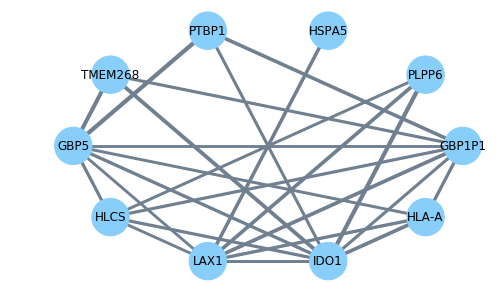

In [336]:
plt.figure(figsize=(8,5))
pos = nx.circular_layout(G)
#nx.draw_networkx_edges(G,pos=pos,width=[float(d['weight']*10) for (u,v,d) in G.edges(data=True)],edge_color=color)
nx.draw_networkx_edges(G,pos=pos,width=edge_width1,edge_color='slategray')
nx.draw_networkx_nodes(G,pos,node_size=de,node_color='lightskyblue')

node_labels = nx.get_node_attributes(G, 'desc')
nx.draw_networkx_labels(G, pos, labels=node_labels)

plt.axis('off')
plt.savefig('network_small.eps', dpi=300)

plt.show()

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import svm

In [59]:
x_train = X_train[nodes]
x_test = X_test[nodes]

In [62]:
# SVM
accsum1 = 0
precsum1 = 0
recsum1 = 0
f1sum1 = 0
aucsum1 = 0
m = 5

for i in range(m):
    lsvc = LinearSVC() 
    lsvc.fit(x_train,y_train)                

    y_pred = lsvc.predict(x_test)
    accsum1 = accsum1 + accuracy_score(y_test, y_pred)
    precsum1 = precsum1 + precision_score(y_test, y_pred)
    recsum1 = recsum1 + recall_score(y_test, y_pred)
    f1sum1 = f1sum1 + f1_score(y_test, y_pred)
        
    y_score = lsvc.decision_function(x_test) 
    aucsum1 = aucsum1 + roc_auc_score(y_test, y_score)

accsum1 = accsum1 / m
precsum1 = precsum1 / m
recsum1 = recsum1 / m
f1sum1 = f1sum1 / m   
aucsum1 = aucsum1 / m

C:\Users\nikki\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nikki\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\nikki\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nikki\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\nikki\Anaconda3\lib\site-packages\sklearn\utils\valid

In [66]:
x_train = X_train[column]
x_test = X_test[column]

In [68]:
from sklearn.metrics import roc_curve, auc
m = 1
acc = 0
prec = 0
rec = 0
f1 = 0
auc_roc = 0

for j in range(m):
    lsvc = LinearSVC()         
    lsvc.fit(x_train,y_train)               
    y_pred = lsvc.predict(x_test)
    
    acc += accuracy_score(y_test,y_pred)
    prec += precision_score(y_test,y_pred)
    rec += recall_score(y_test,y_pred)
    f1 += f1_score(y_test,y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_roc += auc(fpr, tpr)
    
acc = acc/m
prec = prec/m
rec = rec/m
f1 = f1/m
auc_roc = auc_roc/m

C:\Users\nikki\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
